# Nissan Maxima Fuel Efficiency
One of the authors owned a Nissan Maxima for 8 years. Being a statistician, he recorded the car’s fuel efficiency (in mpg) each time he filled the tank. He wanted to know what fuel efficiency to expect as “ordinary” for his car. (Hey, he’s a statistician. What would you expect?13) Knowing this, he was able to predict when he’d need to fill the tank again and to notice if the fuel efficiency suddenly got worse, which could be a sign of trouble. (Data in Nissan).
#### QUESTION: How would you describe the distribution of Fuel efficiency for this car?

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Nissan Maxima Fuel Efficiency
df = pd.read_csv("../data/nissan.txt", sep="\t")
df.head()

,mpg
0,21.964
1,23.694
2,18.824
3,20.851
4,26.370


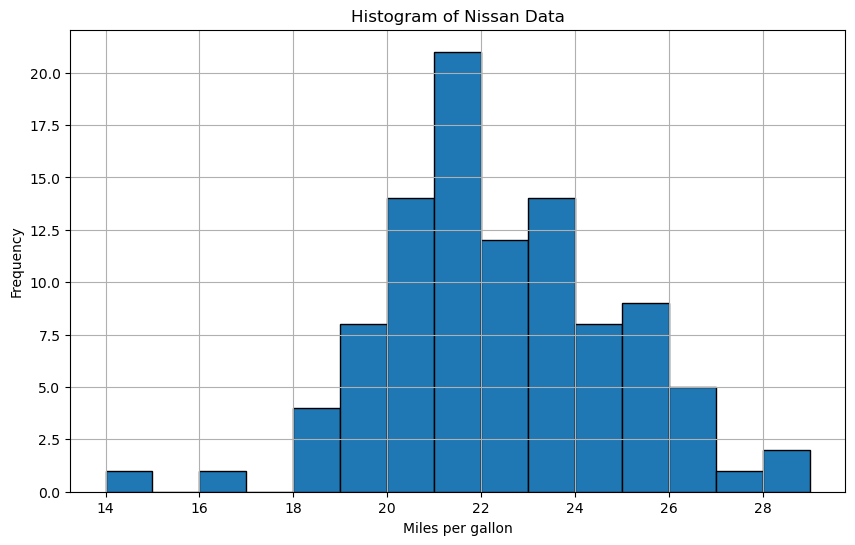

In [46]:
# Convert to Series if only one column is needed
s = df.iloc[:, 0]

# create bin with a value of 1 
min_val = s.min()
max_val = s.max()
bin = range(math.floor(min_val), math.ceil(max_val) + 1)

# plot histogram
s.plot(kind="hist", bins=bin, edgecolor="black", title="Histogram of Nissan Data", figsize=(10, 6))
plt.xlabel("Miles per gallon")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## Lets find out about the spread of the data

In [47]:
s.describe()

count    100.000000
mean      22.411990
std        2.447137
min       14.684000
25%       20.842000
50%       22.051000
75%       23.984250
max       28.175000
Name: mpg, dtype: float64

## We have a few ways to visualise the spread of the data

## Boxplot
s.boxplot()


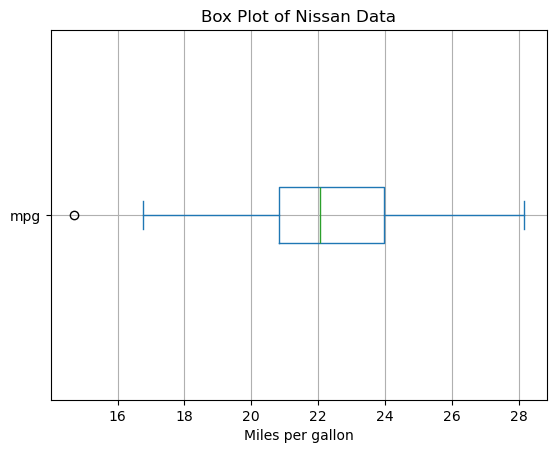

In [48]:
s.plot(kind='box', vert=False)
plt.title("Box Plot of Nissan Data")
plt.xlabel("Miles per gallon")
plt.grid(True)
plt.show()


## Voilin Plot
You'll need to install the `seaborn` package to use this plot.

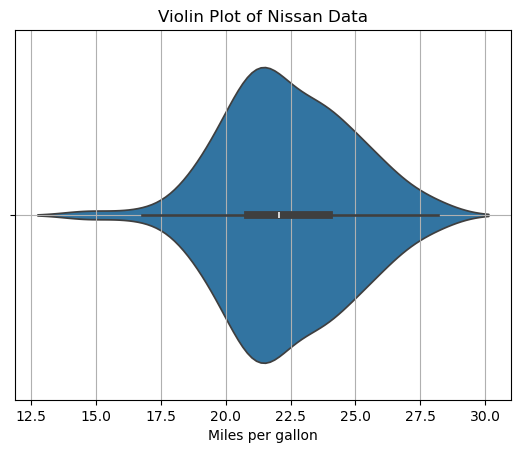

In [49]:
import seaborn as sns
sns.violinplot(x=s)
plt.title("Violin Plot of Nissan Data")
plt.xlabel("Miles per gallon")
plt.grid(True)
plt.show()

## Kernel Density Estimate (KDE) Plot

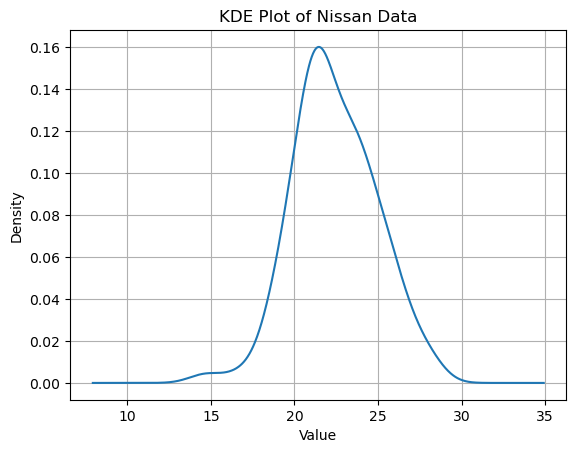

In [50]:
s.plot(kind='kde')
plt.title("KDE Plot of Nissan Data")
plt.xlabel("Value")
plt.grid(True)
plt.show()


## Bonus: Overlay Histogram with KDE

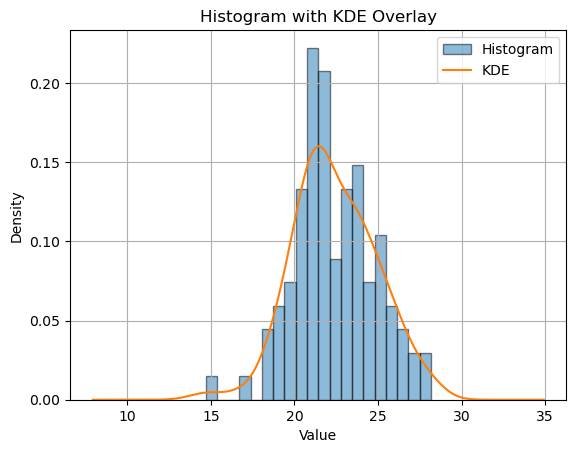

In [51]:
s.plot(kind='hist', bins=20, density=True, alpha=0.5, edgecolor="black", label='Histogram')
s.plot(kind='kde', label='KDE')
plt.title("Histogram with KDE Overlay")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


## Overlay Standard Deviation on KDE:

I like overlaying the standard deviation on a KDE plot as it helps to visualise the spread of the data.

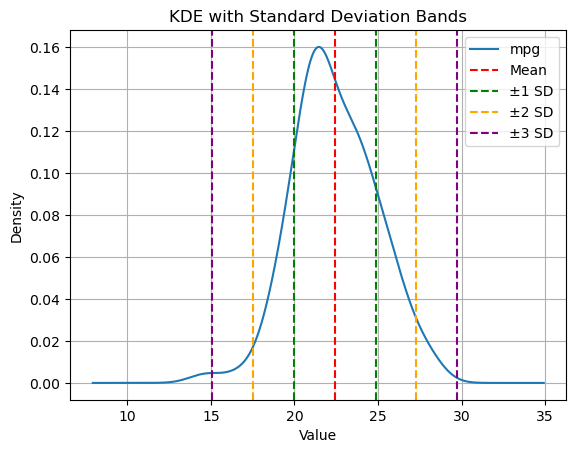

In [52]:
## Overlay Standard Deviation on KDE:

# Compute stats
mean = s.mean()
std = s.std()

# Plot KDE
s.plot(kind='kde')
plt.title("KDE with Standard Deviation Bands")
plt.xlabel("Value")
plt.grid(True)

# Overlay mean and std bands
plt.axvline(mean, color='red', linestyle='--', label='Mean')
plt.axvline(mean - std, color='green', linestyle='--', label='±1 SD')
plt.axvline(mean + std, color='green', linestyle='--')
plt.axvline(mean - 2*std, color='orange', linestyle='--', label='±2 SD')
plt.axvline(mean + 2*std, color='orange', linestyle='--')
plt.axvline(mean - 3*std, color='purple', linestyle='--', label='±3 SD')
plt.axvline(mean + 3*std, color='purple', linestyle='--')

plt.legend()
plt.show()